<img src="https://astanait.edu.kz/wp-content/uploads/2020/05/aitu-logo-2-600x315.png" width="300" height="222" >
<br>
<p style="text-align: center;  font-size: 16px;"> Faculty of Information Technology </p>
<p style="text-align: center;  font-size: 16px;"> Big Data Analysis </p>
    
<br> 

<h3 style="text-align: center"> Data Science Programming 2 (Python) </h3>
<h3 style="text-align: center"> Midterm Project: San Francisco Building Permits </h3> 

<br>

<h4 style="text-align: right">Prepared by:</h4>
<p style="text-align: right; font-size: 12px; margin-right: 49px;">Assylnur Lesken,</p>   
<p style="text-align: right; font-size: 12px; margin-right: 49px;">Yerkegul Assaiyn</p>

<h4 style="text-align: right">Instructor:</h4><p style="text-align: right; font-size: 12px; margin-right: 49px;">  Kaisar Mussalim</p>

<br>
<br>

<p style="text-align: center; font-size: 16px; margin-right: 49px;">Nur-Sultan, 2022</h3>
<br>
<br>
<br>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
import operator

from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from statistics import mode

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import scale 

# Introduction

Since 2012 the average US home price has increased 93% (Zillow, 2021) significantly outpacing both inflation and wage growth and resulting in millions of Americans being priced out of the market. While much of this increase is driven by macroeconomic conditions such as a shortage of construction labor and increased materials costs, they are also impacted by increased government regulation. An increase in regulation can serve as a deterrent to construction and significantly lengthen the permitting process by increasing the amount of paperwork and inspections required to build.

 In this analysis we will examine the permitting process in San Francisco, construct a model to predict the length of time it takes to receive a permit (Approval Date – Submission Date) and identify the key variables impacting the permitting timeline.

**About Data Set**

This data set pertains to all types of structural permits from Jan 1, 2013-Feb 25th 2018. Data includes details on application/permit numbers, job addresses, supervisorial districts, and the current status of the applications. Data is uploaded weekly by DBI.

# Data Preparation 

In [2]:
df = pd.read_csv('Building_Permits.csv',index_col=0)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
Permit Number,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,NaN,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.0,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,NaN,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,0.0,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,NaN,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [4]:
df.shape

(198900, 42)

There are 42 columns and close to 200k records in the downloaded version

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198900 entries, 201505065519 to M864287
Data columns (total 42 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Type                             198900 non-null  int64  
 1   Permit Type Definition                  198900 non-null  object 
 2   Permit Creation Date                    198900 non-null  object 
 3   Block                                   198900 non-null  object 
 4   Lot                                     198900 non-null  object 
 5   Street Number                           198900 non-null  int64  
 6   Street Number Suffix                    2216 non-null    object 
 7   Street Name                             198900 non-null  object 
 8   Street Suffix                           196132 non-null  object 
 9   Unit                                    29479 non-null   float64
 10  Unit Suffix                          

**Permit Number** -	Number assigned while filing

**Permit Type** - Type of the permit represented numerically.

**Permit Type Definition** - "Description of the Permit type, for example new construction, alterations"

**Permit Creation Date** - "Date on which permit created, later than or same as filing date"

**Block** - Related to address

**Lot** - Related to address

**Street Number** - Related to address

**Street Number Suffix** - Related to address

**Street Name** - Related to address

**Street Name Suffix** - Related to address

**Unit** - Unit of a building

**Unit suffix** - Suffix if any, for the unit

**Description** - "Details about purpose of the permit. Example: reroofing, bathroom renovation"

**Current Status** - Current status of the permit application. 

**Current Status Date** - Date at which current status was entered

**Filed Date** - Filed date for the permit

**Issued Date** - Issued date for the permit

**Completed Date** - "The date on which project was completed, applicable if Current Status = completed”"

**First Construction Document Date** - Date on which construction was documented

**Structural Notification** - Notification to meet some legal need, given or not

**Number of Existing Stories** - "Number of existing stories in the building. Not applicable for certain permit types"

**Number of Proposed Stories** - Number of proposed stories for the construction/alteration "Voluntary Soft-Story Retrofit"	Soft story to meet earth quake regulations

**Fire Only Permit** - Fire hazard prevention related permit

**Permit Expiration Date** - Expiration date related to issued permit.

**Estimated Cost** - Initial estimation of the cost of the project

**Revised Cost** - Revised estimation of the cost of the project

**Existing Use** - Existing use of the building

**Existing Units** - Existing number of units

**Proposed Use** - Proposed use of the building

**Proposed Units** - Proposed number of units

**Plansets** - "Plan representation indicating the general design intent of the foundation.."

**TIDF Compliance** - TIDF compliant or not, this is a new legal requirement

**Existing Construction Type** - "Construction type, existing,as categories represented numerically"

**Existing Construction Type Description** - "Description of the above, for example, wood or other construction types"

**Proposed Construction Type** - "Construction type, proposed, as categories  represented numerically"

**Proposed Construction Type Description** - Description of the above 

**Site Permit** - Permit for site

**Supervisor District** - Supervisor District to which the building location belongs to

**Neighborhoods - Analysis Boundaries** - Neighborhood to which the building location belongs to

**Zipcode** - Zipcode of building address

**Location** - Location in latitude, longitude pair.

**Record ID** -	Some ID, not useful for this


In [6]:
df.isnull().sum()

Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing Stories                 42784
Number of Proposed S

It looks like there's several columns have missing values cause they provide no value to the data but rather make it messy.


## Data cleaning


For dealing with missing values, we need to figure out why the value is missing. So we need to understand is this value missing because it wasn't recorded or because it doesn't exist.

In [7]:
df[['Street Number Suffix', 'Zipcode', 'Unit', 'Unit Suffix', 'Structural Notification', 'Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'TIDF Compliance', 'Site Permit']]

,Street Number Suffix,Zipcode,Unit,Unit Suffix,Structural Notification,Voluntary Soft-Story Retrofit,Fire Only Permit,TIDF Compliance,Site Permit
Permit Number,,,,,,,,,
201505065519,NaN,94102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201604195146,NaN,94102.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
201605278609,NaN,94109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201611072166,NaN,94109.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
201611283529,NaN,94102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
M862628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201712055595,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
M863507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From this we can see that a lot of values in the "Street Number Suffix" column is missing and values in the "Zipcode" column is missing but there is not so much as in the "Street Number Suffix". So we take it likely because it does not exist and a value in the "Zipcode" column cause it was not recorded.

In [8]:
missing_values = df.isnull().sum()/len(df)
[missing_values.index[i] for i in range(len(missing_values)) if missing_values[i]>0.80]

['Street Number Suffix',
 'Unit',
 'Unit Suffix',
 'Structural Notification',
 'Voluntary Soft-Story Retrofit',
 'Fire Only Permit',
 'TIDF Compliance',
 'Site Permit']

In [9]:
df.drop(columns=['Street Number Suffix',
 'Unit',
 'Unit Suffix',
 'Structural Notification',
 'Voluntary Soft-Story Retrofit',
 'Fire Only Permit',
 'TIDF Compliance',
 'Site Permit'],inplace=True)

We need to search columns that could be colinear to other columns. Then we will drop them because they can  lead to overfitting.

In [10]:
def unique_vals(df):
    res = pd.DataFrame()
    cols = []
    nunique = []
    unique = []
    datatype = []
    for column in df:
        cols.append(column)
        nunique.append(df[column].nunique() )
        unique.append( df[column].unique() )
        datatype.append(df[column].dtype)
        
    
    res['col_name'] = cols
    res['number of unique values'] = nunique
    res['unique values'] = unique
    res['dtype'] = datatype

    return res.sort_values('number of unique values')

In [11]:
unique_vals(df).head(10)

,col_name,number of unique values,unique values,dtype
28,Proposed Construction Type Description,5,"[nan, constr type 1, wood frame (5), constr ty...",object
27,Proposed Construction Type,5,"[nan, 1.0, 5.0, 3.0, 4.0, 2.0]",float64
26,Existing Construction Type Description,5,"[constr type 3, constr type 1, wood frame (5),...",object
25,Existing Construction Type,5,"[3.0, 1.0, 5.0, nan, 2.0, 4.0]",float64
0,Permit Type,8,"[4, 3, 8, 6, 7, 1, 5, 2]",int64
1,Permit Type Definition,8,"[sign - erect, additions alterations or repair...",object
24,Plansets,8,"[2.0, 0.0, nan, 6.0, 4.0, 3.0, 20.0, 9000.0, 1.0]",float64
29,Supervisor District,11,"[3.0, 6.0, 10.0, 5.0, 8.0, 2.0, 9.0, 4.0, 1.0,...",float64
9,Current Status,14,"[expired, issued, withdrawn, complete, filed, ...",object
7,Street Suffix,21,"[St, Av, Tr, Ct, Bl, Wy, Dr, nan, Rd, Cr, Pl, ...",object


From this we can say that columns 'Proposed Construction Type Description' & 'Proposed Construction Type' are identical. Also there is other columns like this two: 'Existing Construction Type Description' & 'Existing Construction Type', 'Permit Type' & 'Permit Type Definition'. Then we will search to other columns that will be colinear.

Text(0.5, 1.0, 'Comparison of the Estimated and Revised costs')

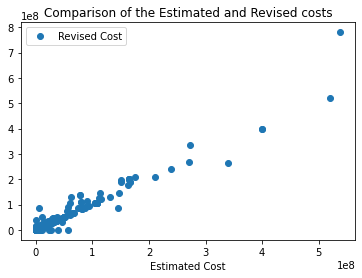

In [12]:
df.plot(x='Estimated Cost', y='Revised Cost', style='o');
plt.title("Comparison of the Estimated and Revised costs")

Text(0.5, 1.0, 'Comparison of the Estimated and Revised Stories Numbers')

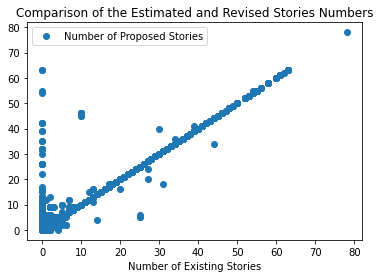

In [13]:
df.plot(x='Number of Existing Stories', y='Number of Proposed Stories', style='o');
plt.title("Comparison of the Estimated and Revised Stories Numbers")

Text(0.5, 1.0, 'Comparison of the Estimated and Revised Units')

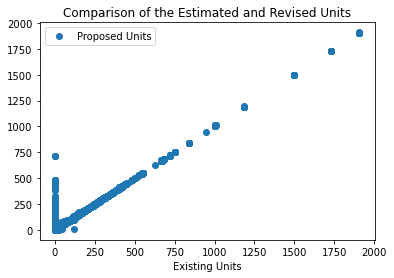

In [14]:
df.plot(x='Existing Units', y='Proposed Units', style='o');
plt.title("Comparison of the Estimated and Revised Units")

Text(0.5, 1.0, 'Comparison of the Current Status date and Competed Date')

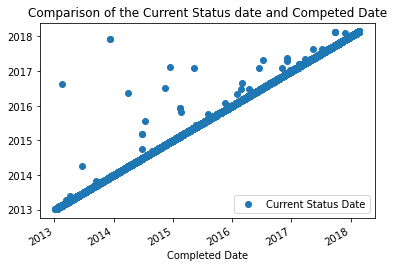

In [15]:
df['Completed Date'] = pd.to_datetime(df['Completed Date'])
df['Current Status Date'] = pd.to_datetime(df['Current Status Date'])
df.plot(x='Completed Date', y='Current Status Date', style='o');
plt.title("Comparison of the Current Status date and Competed Date")

In [16]:
df['Revised Cost'].fillna(df['Estimated Cost'], inplace=True)
df['Estimated Cost'].fillna(df['Revised Cost'], inplace=True)

df['Number of Existing Stories'].fillna(df['Number of Proposed Stories'], inplace=True)
df['Number of Proposed Stories'].fillna(df['Number of Existing Stories'], inplace=True)

df['Existing Units'].fillna(df['Proposed Units'], inplace=True)
df['Proposed Units'].fillna(df['Existing Units'], inplace=True)

df['Completed Date'].fillna(df['Current Status Date'], inplace=True)

Drop columns that could be colinear to other columns in the data and hence lead to overfitting 

These include:Permit Type Definition, Proposed Construction Type Description, Existing Construction Type Description, Number of existing stories, estimated cost, existing units,Permit Creation Date, Completed Date

In [17]:
df.drop(columns=['Permit Type Definition',
 'Proposed Construction Type Description',
 'Existing Construction Type Description', 
 'Number of Existing Stories','Estimated Cost','Existing Units',
 'Permit Creation Date','Completed Date'],axis=1,inplace=True)

In [18]:
# 
df['Existing Construction Type'] = df[['Permit Type','Existing Construction Type']].groupby('Permit Type').transform(lambda x: x.fillna(mode(x)))
df['Proposed Construction Type'] = df[['Permit Type','Proposed Construction Type']].groupby('Permit Type').transform(lambda x: x.fillna(mode(x)))

In [19]:
df.dropna(axis=0,inplace=True)

In [20]:
df.shape

(131168, 26)

After dropping unnecessary columns with null values & colinear ones we have 26 columns and close to 132k records. So our dropped unnecessary columns form the 50% of all columns. Then we will check for outliers.

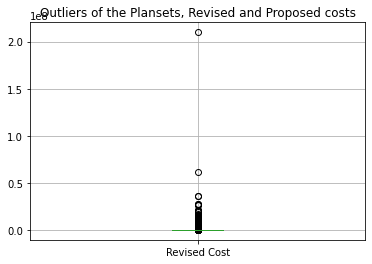

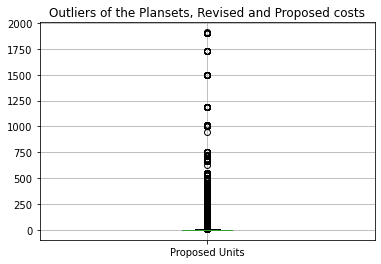

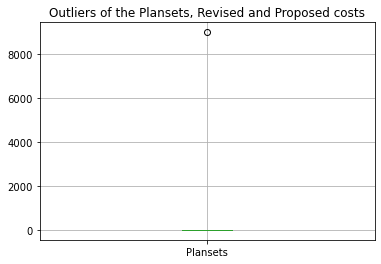

In [21]:
def remove_outliers(col):
    Q1 = col.describe()[4] 
    Q3 = col.describe()[6]
    IQR = Q3 - Q1
    return (df[(col > (Q1 - 1.5 * IQR)) & (col < (Q3 + 1.5 * IQR))])



for column in ['Revised Cost','Proposed Units','Plansets' ]:
    plt.figure()
    df.boxplot([column])
    plt.title("Outliers of the Plansets, Revised and Proposed costs")

In [22]:
df = remove_outliers(df['Revised Cost'])
df = remove_outliers(df['Proposed Units'])
df = remove_outliers(df['Plansets'])

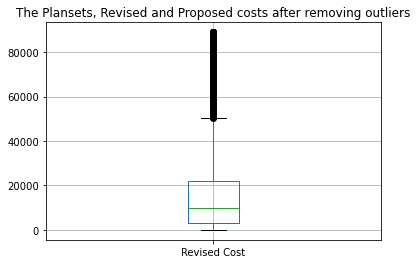

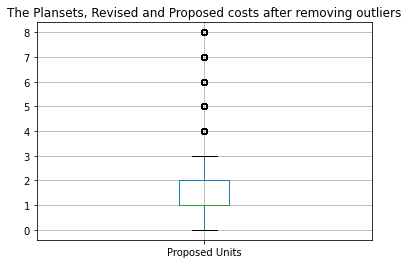

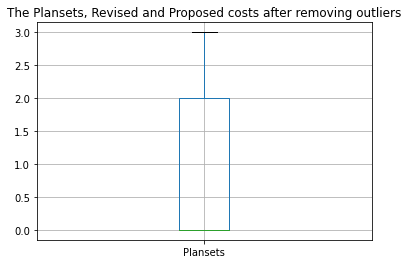

In [23]:
for column in ['Revised Cost','Proposed Units','Plansets' ]:
    plt.figure()
    df.boxplot([column])
    plt.title("The Plansets, Revised and Proposed costs after removing outliers")

# Exploratory Data Analysis

Now check the dimension of the given data set ffter dropping outliers.

In [24]:
df.shape

(96583, 26)

So we have 26 columns and about 96583 records.

In [25]:
df.drop_duplicates()
df.shape

(96583, 26)

And we observe that there is no duplicate column in the data set .

In [26]:
df.describe()

,Permit Type,Street Number,Number of Proposed Stories,Revised Cost,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID
count,96583.000000,96583.000000,96583.000000,96583.000000,96583.000000,96583.000000,96583.000000,96583.000000,96583.000000,96583.000000,9.658300e+04
mean,7.846443,1119.190727,4.338015,16755.147397,1.745732,0.953936,4.458103,4.454676,5.827475,94116.645445,1.199920e+12
std,0.862714,1163.675136,6.889622,19459.447240,1.701162,0.999037,1.300425,1.303395,2.986933,8.753848,4.532067e+11
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,94102.000000,1.296629e+10
25%,8.000000,218.000000,2.000000,3000.000000,1.000000,0.000000,5.000000,5.000000,3.000000,94110.000000,1.313843e+12
50%,8.000000,664.000000,3.000000,10000.000000,1.000000,0.000000,5.000000,5.000000,6.000000,94116.000000,1.369733e+12
75%,8.000000,1715.000000,3.000000,22000.000000,2.000000,2.000000,5.000000,5.000000,8.000000,94122.000000,1.431144e+12
max,8.000000,8331.000000,63.000000,88922.000000,8.000000,3.000000,5.000000,5.000000,11.000000,94158.000000,1.498339e+12


Then we use describe method to have information about the variables

Using value_counts() method on Proposed Construction Type and Permit Type to identify the count of each category in that column.

In [27]:
df['Proposed Construction Type'].value_counts()

5.0    81288
1.0    10442
3.0     3318
2.0     1365
4.0      170
Name: Proposed Construction Type, dtype: int64

In [28]:
df['Permit Type'].value_counts()

8    93617
3     2965
2        1
Name: Permit Type, dtype: int64

Plotting heat map to understand the correlation of variables .

Text(0.5, 1.0, 'Correlation of variables')

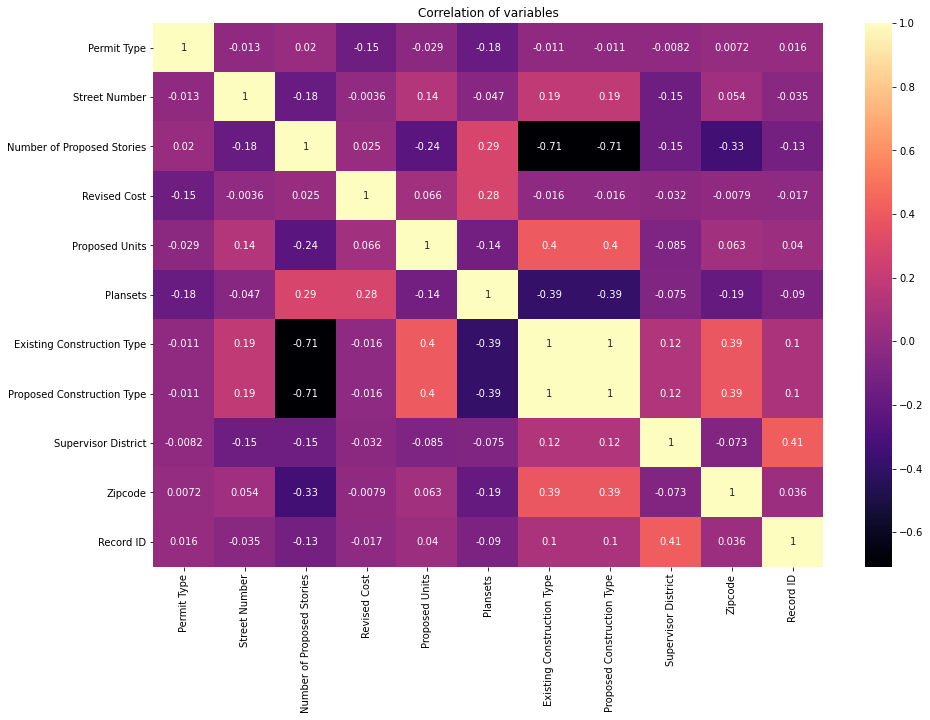

In [29]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='magma')
ax.set_title("Correlation of variables")

Then we plot Revised Cost to understand the distribution.

Text(0.5, 1.0, 'Distribution of Revised Cost')

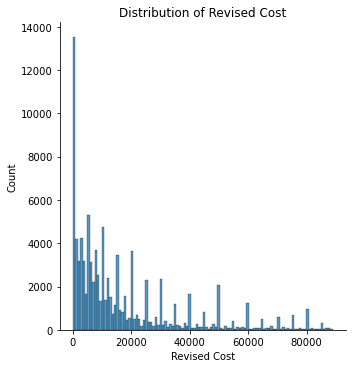

In [31]:
f = sns.displot(df['Revised Cost'], kde=False)
plt.title("Distribution of Revised Cost")

Plot "Proposed Construction Type" to understand which of the proposed type of construction that is the most popular among completed applications for a construction permit.

Text(0.5, 1.0, 'Most popular type of Proposed Construction with current status compete')

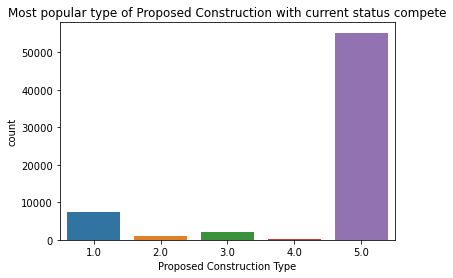

In [32]:
sns.countplot(x = "Proposed Construction Type", data = df[(df['Current Status'])=='complete'])
plt.title("Most popular type of Proposed Construction with current status compete")

Plot "Proposed Construction Type" to understand which type of permit description, for example, new construction, changes are the most popular among completed current status.

Text(0.5, 1.0, 'Most popular type of Proposed Construction with current status issued')

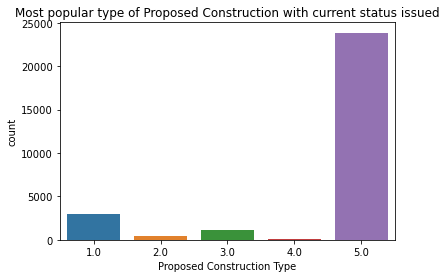

In [33]:
sns.countplot(x = "Proposed Construction Type", data = df[(df['Current Status'])=='issued'])
plt.title("Most popular type of Proposed Construction with current status issued")

Plot "Proposed Construction Type" to understand which of the proposed type of construction that is the most popular among issued applications for a construction permit.

Text(0.5, 1.0, 'Most popular type of Permit with current status complete')

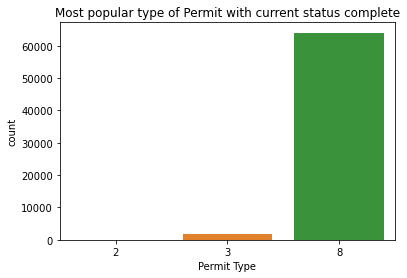

In [34]:
sns.countplot(x = "Permit Type", data = df[(df['Current Status'])=='complete'])
plt.title("Most popular type of Permit with current status complete")

Plot "Permit Type" to understand which type of permit description, for example, new construction, changes are the most popular among complete current status.

Text(0.5, 1.0, 'Most popular type of Permit with current status issued')

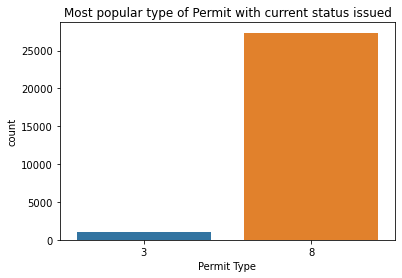

In [35]:
sns.countplot(x = "Permit Type", data = df[(df['Current Status'])=='issued'])
plt.title("Most popular type of Permit with current status issued")

Plot "Permit Type" to understand which type of permit description, for example, new construction, changes are the most popular among issued current status.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most popular status')

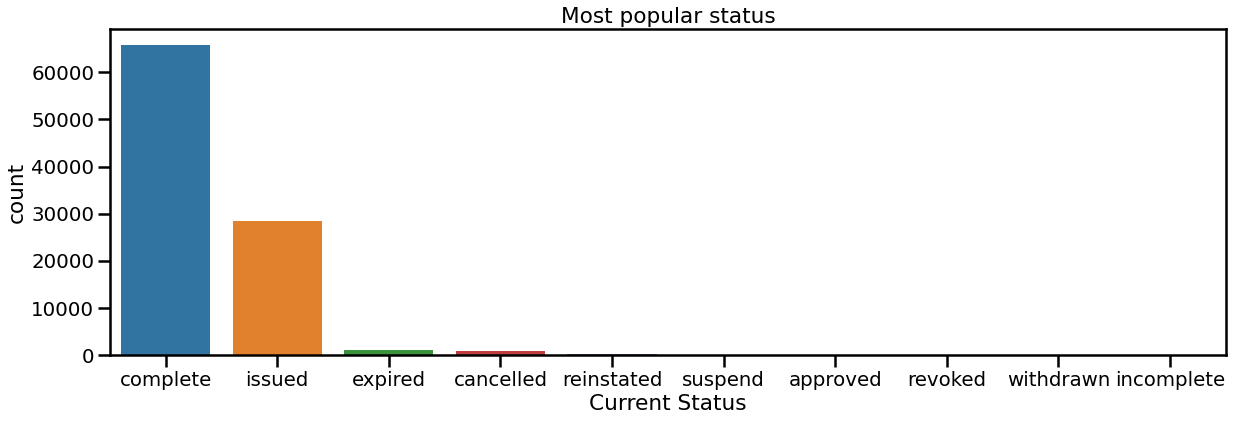

In [36]:
plt.figure(figsize = (20, 6))
sns.set_context("poster", font_scale = 0.9)
sns.countplot(df['Current Status'])
plt.title("Most popular status")

From this countplot we see that complete current statuses much more than others. Also issued current status is about 30 000 while expired and cancelled current statuses are less than 5000.

### Data Transformation


In [37]:
df['Current Status Date'] = pd.to_datetime(df['Current Status Date'])
df['Filed Date'] = pd.to_datetime(df['Filed Date'])
df['Issued Date'] = pd.to_datetime(df['Issued Date'])
df['First Construction Document Date'] = pd.to_datetime(df['First Construction Document Date'])
df['Permit Expiration Date'] = pd.to_datetime(df['Permit Expiration Date'])

We want to see at what stage/month the applications for a permit and the issuance of a permit take place.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most popular type of month of the Filed Date for a permit')

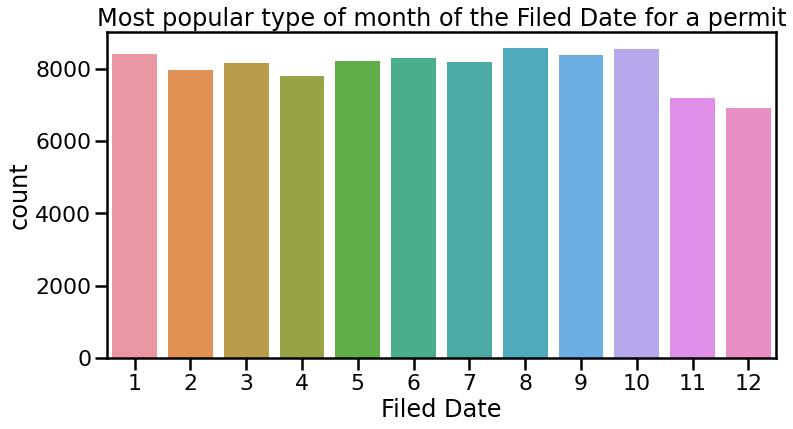

In [38]:
# Plotting the Countplot for Filed Date Month:

plt.figure(figsize=(12,6))
sns.set_context("poster")
sns.countplot(df['Filed Date'].dt.month)
plt.title("Most popular type of month of the Filed Date for a permit")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most popular type of month of the Issued Date for a permit')

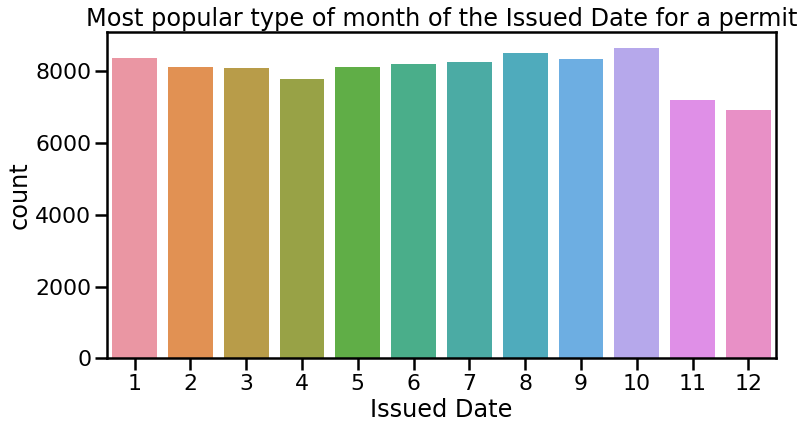

In [39]:
# Plotting the Countplot for Issued Date Month:

plt.figure(figsize=(12,6))
sns.set_context("poster")
sns.countplot(df['Issued Date'].dt.month)
plt.title("Most popular type of month of the Issued Date for a permit")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most popular type of day of the Issued Date for a permit')

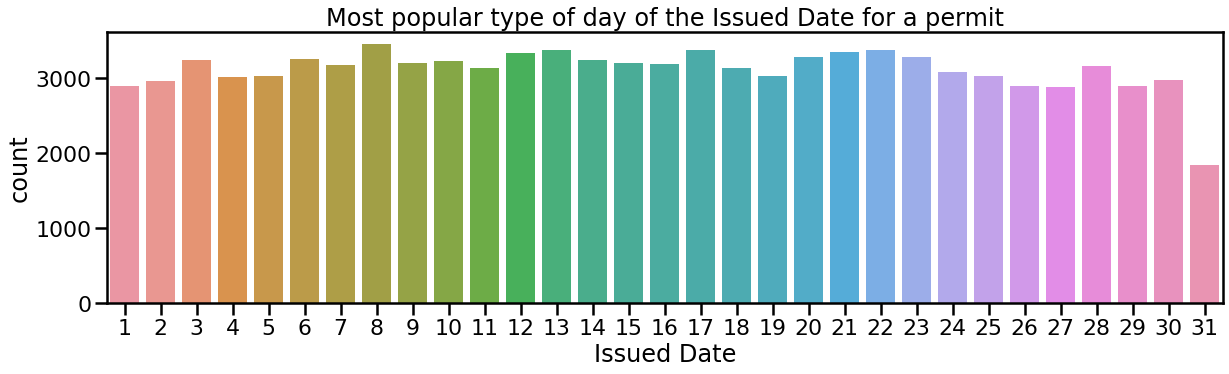

In [40]:
# Countplot for the days on which permits are issued:

plt.figure(figsize=(20,5))
sns.countplot(df['Issued Date'].dt.day)
plt.title("Most popular type of day of the Issued Date for a permit")

It is plausible to conclude by just looking at the two count plots above that most filings and issues occur during the all of a year. There is no exact month or months for it. But we can also notice that the applications decrease towards the end

# Feature engineering

We will calculate how long it will take to issue a building permit by creating a target time variable in days from the Filed Date and the Issued Date.

In [41]:
df[['Issued Date','Filed Date']].head()

,Issued Date,Filed Date
Permit Number,,
201611072166,2017-07-18,2016-11-07
201706300814,2017-06-30,2017-06-30
201708165014,2017-08-16,2017-08-16
201710110928,2017-10-11,2017-10-11
201711274868,2017-11-27,2017-11-27


In [42]:
df['days'] = (df['Issued Date'] - df['Filed Date']).dt.days
df['days'].describe()

count    96583.000000
mean        17.152211
std         65.828683
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max       1545.000000
Name: days, dtype: float64

In [43]:
df[df['days']== df['days'].describe()['max']]
# Permit type with longest issue time is of category 3

,Permit Type,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,...,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,days
Permit Number,,,,,,,,,,,,,,,,,,,,,
201304104189,3,5890,013A,219,Maynard,St,horizontal addition at westerly of front. enla...,issued,2017-07-03,2013-04-10,...,1.0,2.0,5.0,5.0,11.0,Excelsior,94112.0,"(37.72964231884756, -122.4255680391135)",1301258190425,1545


In [44]:
df.loc[df['days']== 0][:5] 
# Permit type with shortest issue time are mainly in category 8.

,Permit Type,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,...,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,days
Permit Number,,,,,,,,,,,,,,,,,,,,,
201706300814,8,1739,020,1291,11th,Av,re-roofing,complete,2017-07-12,2017-06-30,...,5.0,0.0,5.0,5.0,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692,0
201708165014,8,1824,006,1435,29th,Av,re-roofing,issued,2017-08-16,2017-08-16,...,1.0,0.0,5.0,5.0,4.0,Sunset/Parkside,94122.0,"(37.76052279949518, -122.4879889739165)",1474841115935,0
201710110928,8,5934,020,938,Felton,St,reroofing,complete,2017-10-31,2017-10-11,...,1.0,0.0,5.0,5.0,9.0,Portola,94134.0,"(37.72775517946509, -122.41419227409298)",1482932191681,0
201711274868,8,1744,039,1241,06th,Av,install 6 vinyl windows size for size on back ...,issued,2017-11-27,2017-11-27,...,3.0,0.0,5.0,5.0,5.0,Inner Sunset,94122.0,"(37.76535779270799, -122.46346983597869)",1488409505430,0
201408254591,8,3509,029,63,Grace,St,to comply with physical inspection report cc7777,complete,2017-10-04,2014-08-25,...,4.0,0.0,5.0,5.0,6.0,South of Market,94103.0,"(37.774944547030586, -122.41443674356925)",1353299454075,0


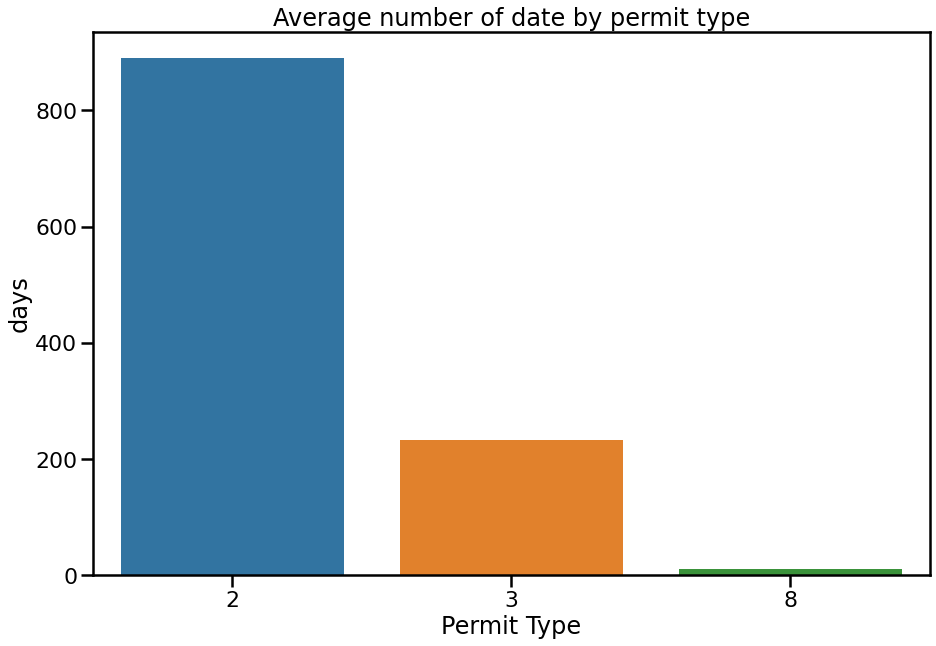

In [47]:
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x='Permit Type', y='days', data=df[['Permit Type', 'days']].groupby('Permit Type', as_index=False).mean());
ax.set_title("Average number of date by permit type");

In this type of permit, the 2nd type takes the longest amount of time.

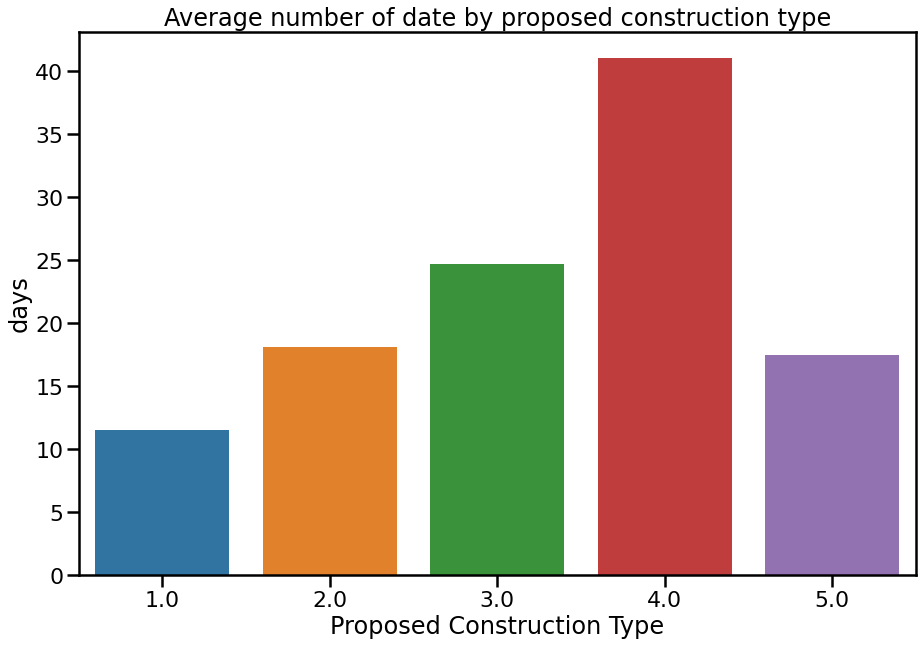

In [48]:
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x='Proposed Construction Type', y='days', data=df[['Proposed Construction Type', 'days']].groupby('Proposed Construction Type', as_index=False).mean());
ax.set_title("Average number of date by proposed construction type");

In this Proposed Construction Type, the 4th type takes the longest amount of time.

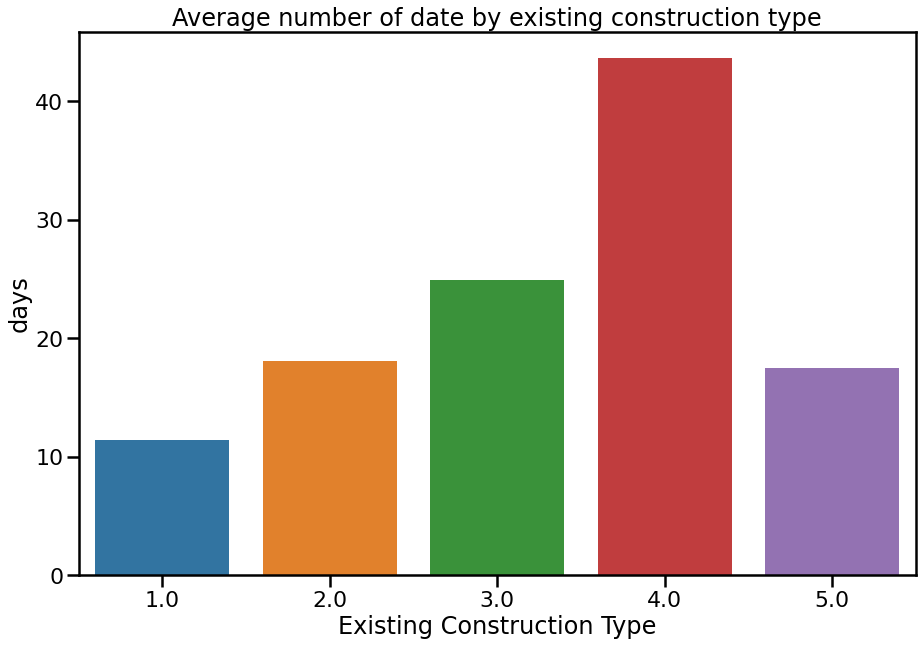

In [49]:
fig,ax = plt.subplots(figsize=(15,8P))
sns.barplot(x='Existing Construction Type', y='days', data=df[['Existing Construction Type', 'days']].groupby('Existing Construction Type', as_index=False).mean());
ax.set_title("Average number of date by existing construction type");

In this Existing Construction Type, the 4th type takes the longest amount of time.

In [50]:
df['First Construction Document Date'] = df['First Construction Document Date'].map(datetime.datetime.toordinal)
df['Permit Expiration Date'] = df['Permit Expiration Date'].map(datetime.datetime.toordinal)
df['Current Status Date'] = df['Current Status Date'].map(datetime.datetime.toordinal)

# Feature Selection

Dropping of Filed Date and Issued dates since they are nolonger informative in our modelling, We drop Record ID since we already have a unique record identifier, we also drop locationn since it's not so informative as we already have a supervisor district which gives us a hint on the area the building is located.

In [51]:
df.drop(columns =['Filed Date','Issued Date','Record ID','Location','Current Status'],axis=1,inplace=True) 

In [52]:
df.head()

,Permit Type,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status Date,First Construction Document Date,Number of Proposed Stories,...,Existing Use,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,days
Permit Number,,,,,,,,,,,,,,,,,,,,,
201611072166,8,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,736534,736528,2.0,...,1 family dwelling,1 family dwelling,1.0,2.0,5.0,5.0,3.0,Nob Hill,94109.0,253
201706300814,8,1739,020,1291,11th,Av,re-roofing,736522,736510,3.0,...,apartments,apartments,5.0,0.0,5.0,5.0,5.0,Inner Sunset,94122.0,0
201708165014,8,1824,006,1435,29th,Av,re-roofing,736557,736557,2.0,...,1 family dwelling,1 family dwelling,1.0,0.0,5.0,5.0,4.0,Sunset/Parkside,94122.0,0
201710110928,8,5934,020,938,Felton,St,reroofing,736633,736613,2.0,...,1 family dwelling,1 family dwelling,1.0,0.0,5.0,5.0,9.0,Portola,94134.0,0
201711274868,8,1744,039,1241,06th,Av,install 6 vinyl windows size for size on back ...,736660,736660,2.0,...,apartments,apartments,3.0,0.0,5.0,5.0,5.0,Inner Sunset,94122.0,0


In [53]:
numerical = [i for i in df.drop(['days'],axis=1).columns 
                  if df.drop(['days'],axis=1)[i].dtype in ['int64', 'float64']]

In [54]:
categorical = [cname for cname in df.columns 
                    if df[cname].nunique() < 15 and df[cname].dtype == "object"]

In [55]:
features = [*numerical, *categorical]

In [56]:
features

['Permit Type',
 'Street Number',
 'Current Status Date',
 'First Construction Document Date',
 'Number of Proposed Stories',
 'Permit Expiration Date',
 'Revised Cost',
 'Proposed Units',
 'Plansets',
 'Existing Construction Type',
 'Proposed Construction Type',
 'Supervisor District',
 'Zipcode']

In [57]:
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features] )

#The code below shows that the numerical columns have minimum skewness.
df[features].skew(axis=0)

Permit Type                        -5.440356
Street Number                       1.429083
Current Status Date                -0.159912
First Construction Document Date    0.013986
Number of Proposed Stories          4.328722
Permit Expiration Date             -0.087993
Revised Cost                        1.660105
Proposed Units                      1.607884
Plansets                            0.092601
Existing Construction Type         -2.104674
Proposed Construction Type         -2.093813
Supervisor District                -0.050722
Zipcode                             0.559903
dtype: float64

# ML

In [58]:
y = df[['days']]
X = df[features]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=7)

### Forward Stepwise Selection

In [60]:
def forward_stepwise_selection(data, target):
    total_features = [[]]
    score_dict = {}
    remaining_features = [col for col in data.columns]
    for i in range(1, len(data.columns)):
        best_score = 0; best_feature = None
        for feature in remaining_features:

            X = total_features[i-1] + [feature]
            model = LinearRegression().fit(data[X], target)
            score = r2_score(target, model.predict(data[X]))

            if score > best_score:
                best_score = score
                best_feature = feature
        total_features.append(total_features[i-1] + [best_feature])
        remaining_features.remove(best_feature)
        score_dict[i] = best_score
    return total_features,score_dict

In [61]:
total_features_fwd, score_dict_fwd = forward_stepwise_selection(X, y)

In [62]:
for i in range(1, 13):
    print('The best model with {} features - {}'.format(i,total_features_fwd[i]))
    print('R_2 score is ',score_dict_fwd[i])
    print()

The best model with 1 features - ['Permit Type']
R_2 score is  0.34155772946580953

The best model with 2 features - ['Permit Type', 'Plansets']
R_2 score is  0.36438222640307094

The best model with 3 features - ['Permit Type', 'Plansets', 'Permit Expiration Date']
R_2 score is  0.3719424901380767

The best model with 4 features - ['Permit Type', 'Plansets', 'Permit Expiration Date', 'Proposed Construction Type']
R_2 score is  0.3784646462823673

The best model with 5 features - ['Permit Type', 'Plansets', 'Permit Expiration Date', 'Proposed Construction Type', 'Revised Cost']
R_2 score is  0.38336438796273886

The best model with 6 features - ['Permit Type', 'Plansets', 'Permit Expiration Date', 'Proposed Construction Type', 'Revised Cost', 'Proposed Units']
R_2 score is  0.384736047170421

The best model with 7 features - ['Permit Type', 'Plansets', 'Permit Expiration Date', 'Proposed Construction Type', 'Revised Cost', 'Proposed Units', 'Number of Proposed Stories']
R_2 score is  0

In [63]:
adj_R2_score = {}
for features in total_features_fwd[1:]:
    model = LinearRegression()
    model.fit(X_train[features], y_train)
    score = r2_score(model.predict(X_test[features]), y_test) 
    p = len(features)
    n = len(X_train)
    adj_r2 = 1-(1-score)*(n-1)/(n-p-1)
    adj_R2_score[len(features)] = adj_r2

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


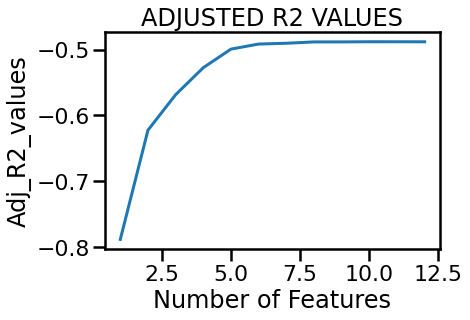

In [64]:
sns.lineplot(np.arange(1,len(total_features_fwd)),list(adj_R2_score.values()))
plt.xlabel('Number of Features')
plt.ylabel('Adj_R2_values')
plt.title('ADJUSTED R2 VALUES');

In [65]:
max(adj_R2_score.items(), key=operator.itemgetter(1))[0]

10

### Linear Regression

In [66]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [95]:
# For convenience let's create a function for all metrics at the same time


mse_list=[]
rmse_list=[]
mae_list=[]
r2_list=[]

def print_evaluate(true, predicted, add):  
    r2_square = metrics.r2_score(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    mae = metrics.mean_absolute_error(true, predicted)
    print('R-squared', np.round(r2_square,3))
    print('MSE:', np.round(mse,3))
    print('RMSE:', np.round(rmse,3))
    print('MAE:', np.round(mae,3))
    
    if add==True:
        r2_list.append(np.round(r2_square,3))
        mse_list.append(np.round(mse,3))
        rmse_list.append(np.round(rmse,3))
        mae_list.append(np.round(mae,3))

print('Test:')    
print_evaluate(y_test, reg.predict(X_test), False)

print('\nTrain:')    
print_evaluate(y_train, reg.predict(X_train), False)

Test:
R-squared 0.402
MSE: 2614.571
RMSE: 51.133
MAE: 19.459

Train:
R-squared 0.379
MSE: 2680.174
RMSE: 51.77
MAE: 19.674


#### Gridsearch, cross-validation

In [68]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 15))}]


# grid search:
model_cv = GridSearchCV(estimator = RFE(reg), 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14]}],
             return_train_score=True, scoring='r2', verbose=1)

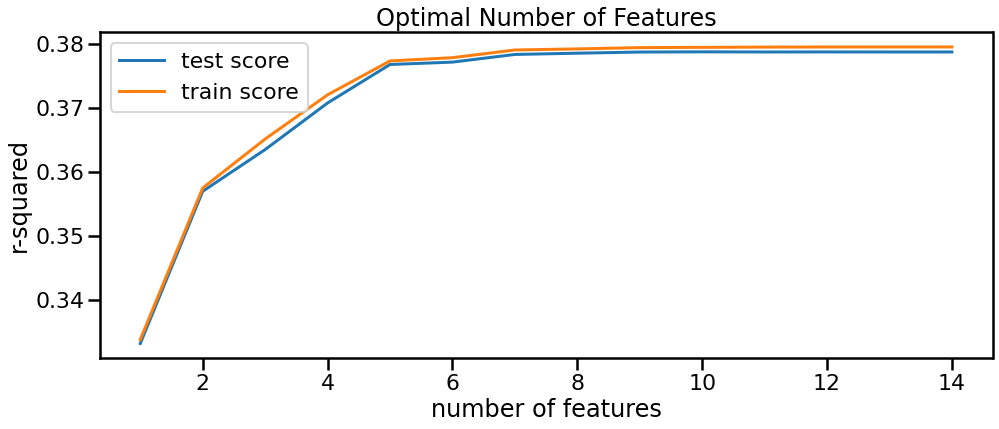

In [69]:
# plotting cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [70]:
model_cv.best_params_

{'n_features_to_select': 10}

In [96]:
# final model
reg = LinearRegression()
reg.fit(X_train, y_train)

rfe = RFE(reg, n_features_to_select = 10)             
rfe.fit(X_train, y_train)

print('Test:')    
print_evaluate(y_test, rfe.predict(X_test), True)

print('\nTrain:')    
print_evaluate(y_train, rfe.predict(X_train), False)

Test:
R-squared 0.402
MSE: 2614.695
RMSE: 51.134
MAE: 19.457

Train:
R-squared 0.379
MSE: 2680.277
RMSE: 51.771
MAE: 19.672


### kNN

In [72]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)


print('Test:')    
print_evaluate(y_test, knn.predict(X_test), False)

print('\nTrain:')    
print_evaluate(y_train,knn.predict(X_train), False)

Test:
R-squared 0.401
MSE: 2619.13
RMSE: 51.177
MAE: 16.772

Train:
R-squared 0.593
MSE: 1759.072
RMSE: 41.941
MAE: 13.53


#### Gridsearch, cross-validation

In [73]:
#params = {'n_neighbors':[3,5,7,9, 15, 17 ,35, 37, 39 ,41, 43, 45, 47, 49,51]}
params = {'n_neighbors':[41, 43, 45, 47]}

# knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 45}

In [97]:
knn = KNeighborsRegressor(n_neighbors=45)
knn.fit(X_train, y_train)


print('Test:')    
print_evaluate(y_test, knn.predict(X_test), True)

print('\nTrain:')    
print_evaluate(y_train,knn.predict(X_train), False)

Test:
R-squared 0.442
MSE: 2442.189
RMSE: 49.419
MAE: 16.56

Train:
R-squared 0.446
MSE: 2391.955
RMSE: 48.908
MAE: 16.287


### Random Forest

In [75]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)


print('Test:')    
print_evaluate(y_test, random_forest.predict(X_test), False)

print('\nTrain:')    
print_evaluate(y_train,random_forest.predict(X_train), False)

<ipython-input-75-1c6c56a33014>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


Test:
R-squared 0.526
MSE: 2072.336
RMSE: 45.523
MAE: 15.185

Train:
R-squared 0.933
MSE: 290.378
RMSE: 17.04
MAE: 5.707


#### Gridsearch, cross-validation

In [76]:
param_grid = {
            'max_depth': range(5,8),
            'n_estimators': [10, 100, 200],
            'max_features': [7,8,9,10]
            
}

rfc_gs = GridSearchCV(estimator=RandomForestRegressor(),
                      param_grid=param_grid, cv=5, 
                      scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

rfc_gs.fit(X, y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(5, 8),
                         'max_features': [7, 8, 9, 10],
                         'n_estimators': [10, 100, 200]},
             scoring='neg_mean_squared_error')

In [77]:
rfc_gs.best_params_

{'max_depth': 5, 'max_features': 7, 'n_estimators': 200}

In [98]:
random_forest = RandomForestRegressor(max_depth=5, max_features=7, n_estimators=200, verbose=False)
random_forest.fit(X_train, y_train)

print('Test:')    
print_evaluate(y_test, random_forest.predict(X_test), True)

print('\nTrain:')    
print_evaluate(y_train,random_forest.predict(X_train), False)

<ipython-input-98-a7591935d3d0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


Test:
R-squared 0.45
MSE: 2407.924
RMSE: 49.071
MAE: 16.602

Train:
R-squared 0.443
MSE: 2407.236
RMSE: 49.064
MAE: 16.611


### Ridge Regression 

In [99]:
alphas = 10**np.linspace(10, -2, 100) * 0.5

ridge = Ridge(normalize=False)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 1, 13)

In [100]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [101]:
ridgecv.alpha_

266.8349615603151

In [102]:
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)

print('Test:')    
print_evaluate(y_test, ridge.predict(scale(X_test)), True)

print('\nTrain:')    
print_evaluate(y_train, ridge.predict(scale(X_train)), False)

Test:
R-squared 0.402
MSE: 2617.808
RMSE: 51.165
MAE: 19.338

Train:
R-squared 0.379
MSE: 2680.212
RMSE: 51.771
MAE: 19.666


### The Lasso

In [103]:
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas*2:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    mean_squared_error(y_test, lasso.predict(scale(X_test)))

In [104]:
lassocv = LassoCV(alphas=alphas, cv=10, max_iter=10000)
lassocv.fit(scale(X_train), y_train.values.ravel())

LassoCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, max_iter=10000)

In [105]:
lassocv.alpha_

0.015269277544167062

In [106]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)

print('Test:')    
print_evaluate(y_test, lasso.predict(scale(X_test)), True)

print('\nTrain:')    
print_evaluate(y_train, lasso.predict(scale(X_train)), False)

Test:
R-squared 0.402
MSE: 2617.301
RMSE: 51.16
MAE: 19.333

Train:
R-squared 0.379
MSE: 2680.185
RMSE: 51.771
MAE: 19.662


# Conclusion

In [107]:
res = pd.DataFrame(index=['Linear Regression','kNN','Random Forest Regressor', 'Ridge Regression', 'The Lasso'])
res['MSE'] = mse_list
res['RMSE'] = rmse_list
res['MAE'] = mae_list
res['R-squared'] = r2_list
res

,MSE,RMSE,MAE,R-squared
Linear Regression,2614.695,51.134,19.457,0.402
kNN,2442.189,49.419,16.560,0.442
Random Forest Regressor,2407.924,49.071,16.602,0.450
Ridge Regression,2617.808,51.165,19.338,0.402
The Lasso,2617.301,51.160,19.333,0.402


**As we see from above R-squared error, Random Forest Regressor performs better than any other model with R² score = 0.45.**

* Forward Stepwise Selection - Number of Features: 10

**Tuned hyperparameters for different models:**

* Linear Regression - {'n_features_to_select: 10'}
* kNN - {'n_neighbors': 45}
* Random Forest - {'max_depth': 5, 'max_features': 7, 'n_estimators': 200}



* Ridge Regression - alpha: 266.8349615603151
* The Lasso - alpha: 0.015269